### Dependencies

In [1]:
# imports for data handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# imports for visualizing
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, display

# imports for training and evaluating
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Load Data

In [2]:
# reproducibility
np.random.seed(7)

# generate data
n_samples = 302

data = {
    'hours_of_sleep': np.random.randint(4, 10, n_samples),
    'cups_of_coffee': np.random.randint(0, 5, n_samples),
    'number_of_slides': np.random.randint(1, 6, n_samples) * 10
}

# as dataframe
students_data = pd.DataFrame(data)

# set target
alertness = students_data['hours_of_sleep'] * (1 + students_data['cups_of_coffee'])
students_data['falls_asleep'] = (alertness - students_data['number_of_slides'] / 3 < 0).astype(int)

### Prepare Data

In [9]:
# inspect
print('Samples:', students_data.shape[0])
students_data.head()#.to_clipboard(sep='\t')

Samples: 302


,hours_of_sleep,cups_of_coffee,number_of_slides,falls_asleep
0,8,4,40,0
1,5,2,10,0
2,7,4,10,0
3,7,0,10,0
4,8,3,50,0


In [4]:
# split into features and target
X = students_data[['hours_of_sleep', 'cups_of_coffee', 'number_of_slides']]
y = 1 - students_data['falls_asleep']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Decision Tree

In [5]:
# init and fit decision tree
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train.values, y_train.values)

# predict
y_train_pred = dt.predict(X_train.values)
y_test_pred = dt.predict(X_test.values)

# evaluate
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Train/Test Accuracy:', train_acc, '/', test_acc)

Train/Test Accuracy: 1.0 / 1.0


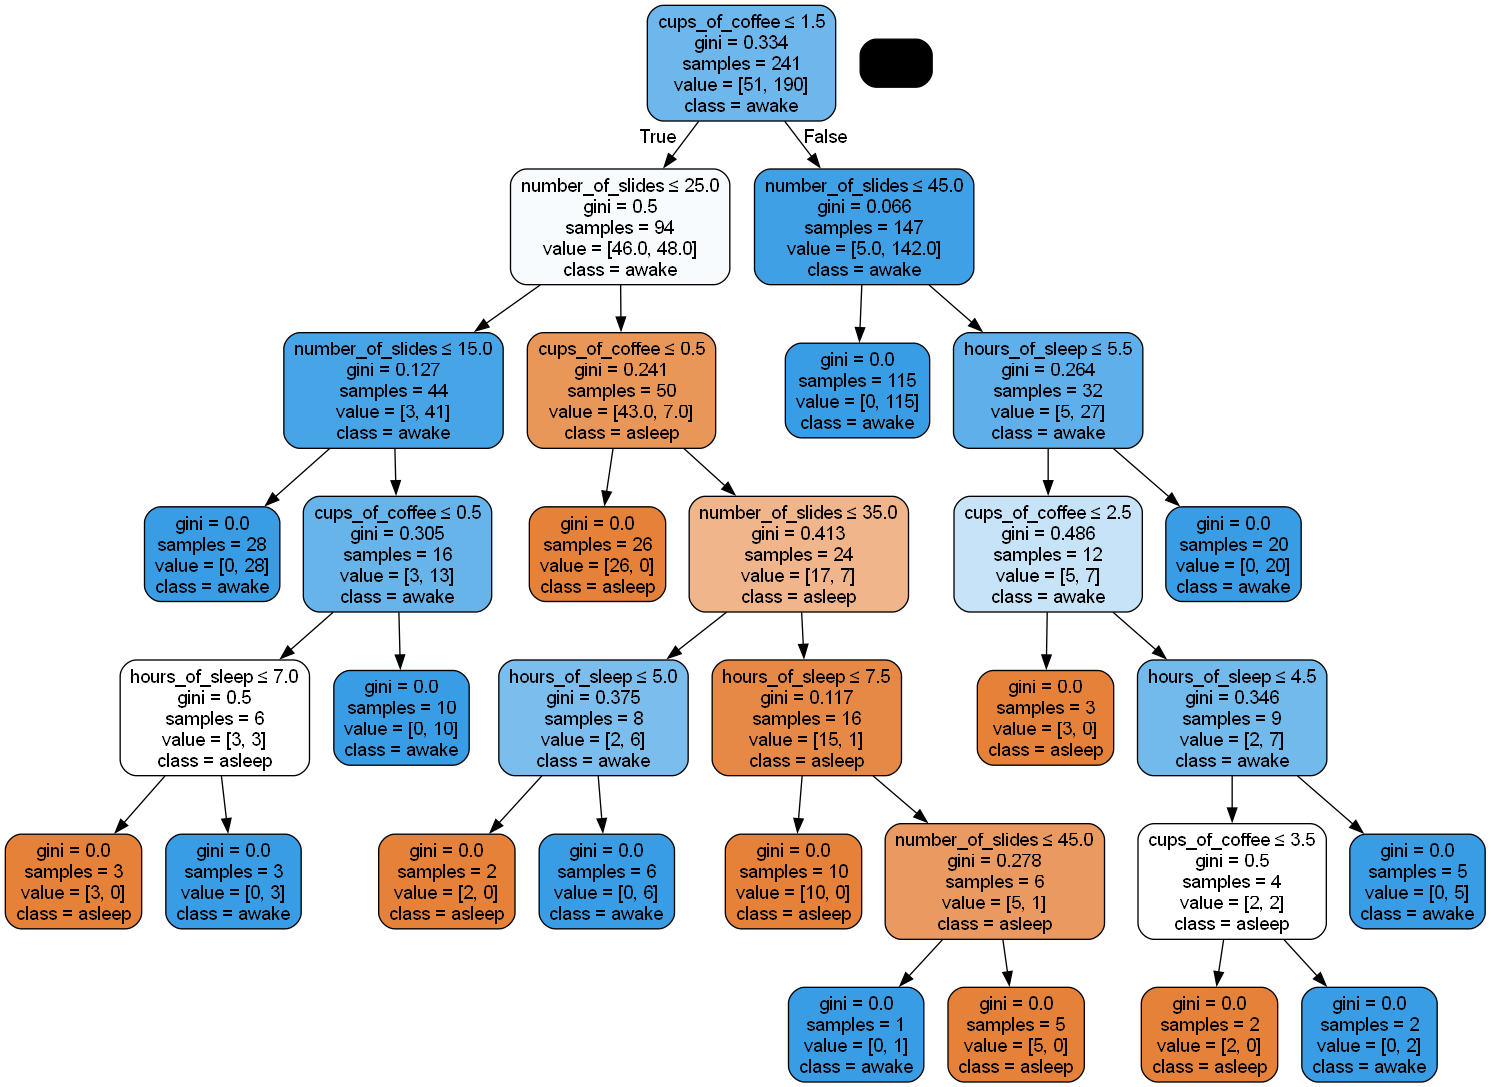

In [6]:
# plot the tree
dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=X.columns,
                           class_names=['asleep', 'awake'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=10)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

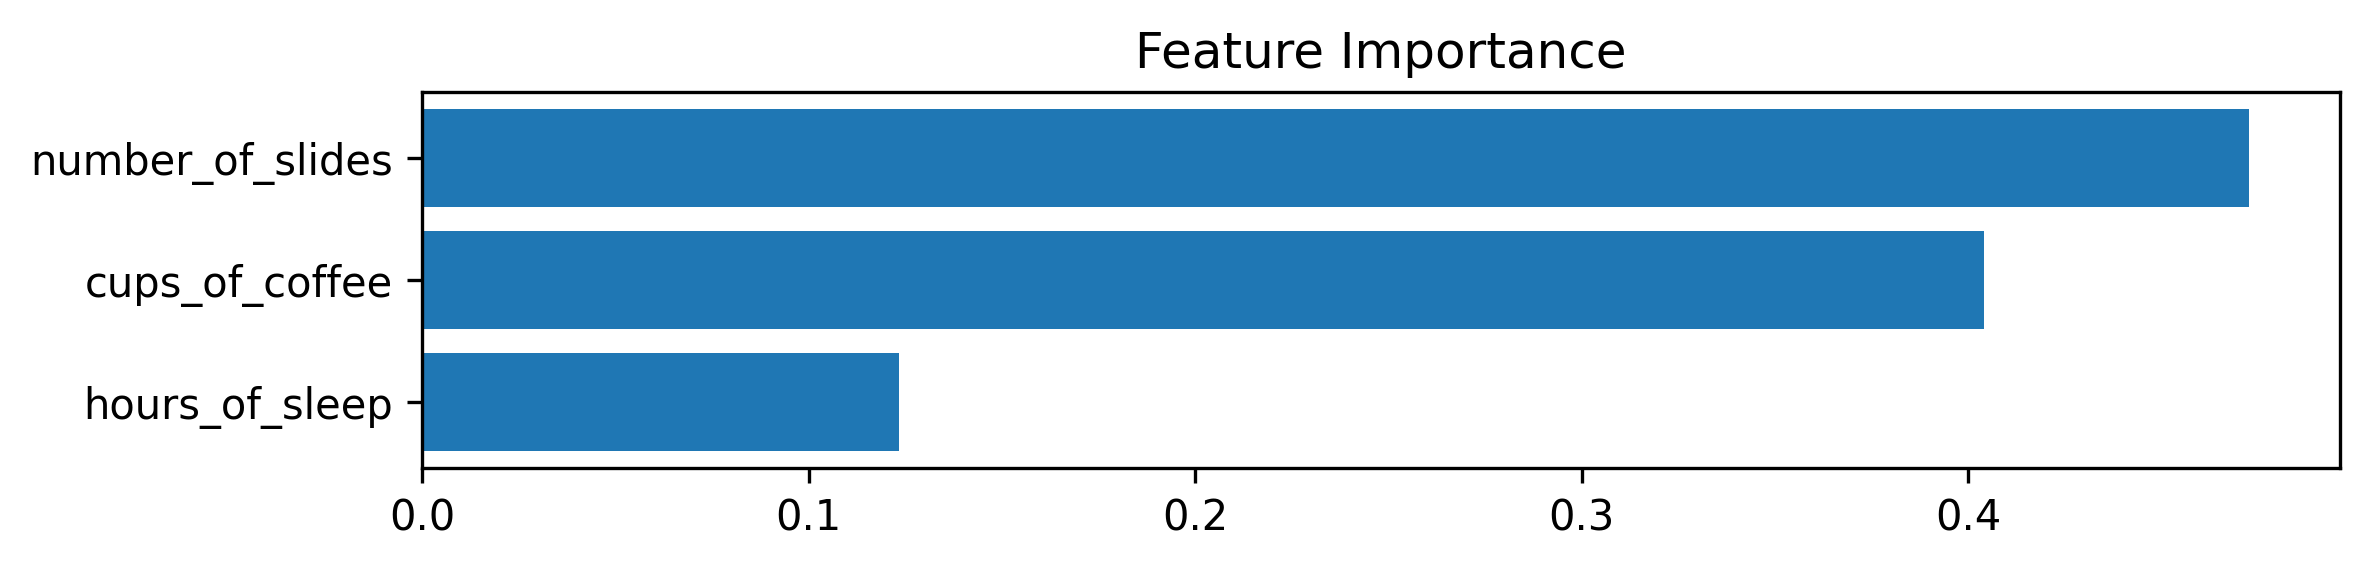

In [7]:
# plot the feature importance
plt.figure(figsize=(8, 2), dpi=300)
plt.barh(X.columns, dt.feature_importances_)
plt.title(f'Feature Importance')
plt.tight_layout()
plt.show()